In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
dataset=pd.read_csv(r"C:\Users\dell\Documents\excells\data1.csv")
dataset.head(2)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,3067,...,1,1.0,202,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/2/2016,2.5,3067,...,1,0.0,156,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019


In [33]:
dataset.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


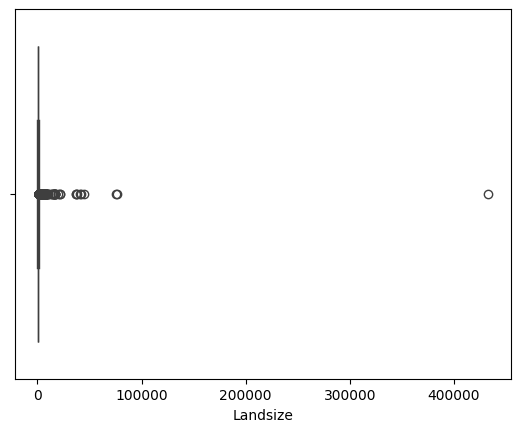

In [34]:
# use of box plot
sns.boxplot(x="Landsize", data=dataset)
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_9108\1734650041.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Landsize"])


<Axes: xlabel='Landsize', ylabel='Density'>

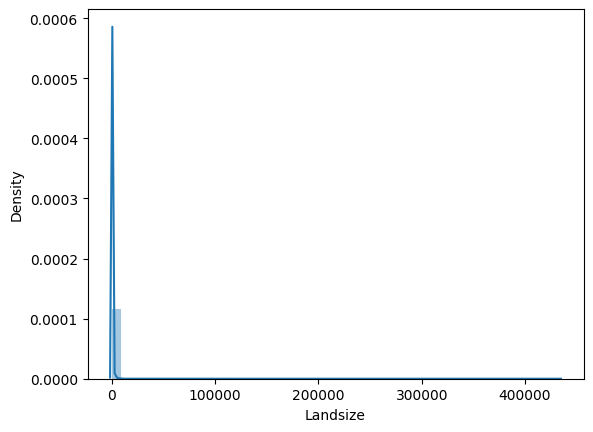

In [35]:
sns.distplot(dataset["Landsize"])
# use of ddistribution plot


we can remove outlier with 2 ways

In [36]:
# take to variable min and max then from normal distribution 
# min=μ-3σ
# min=μ+3σ
min=dataset["Landsize"].mean()-(3*dataset["Landsize"].std())
max=dataset["Landsize"].mean()+(3*dataset["Landsize"].std())
min,max

(np.float64(-11413.591596670249), np.float64(12530.423849983945))

In [37]:
newdata=dataset[dataset["Landsize"]<=max]

<Axes: xlabel='Landsize'>

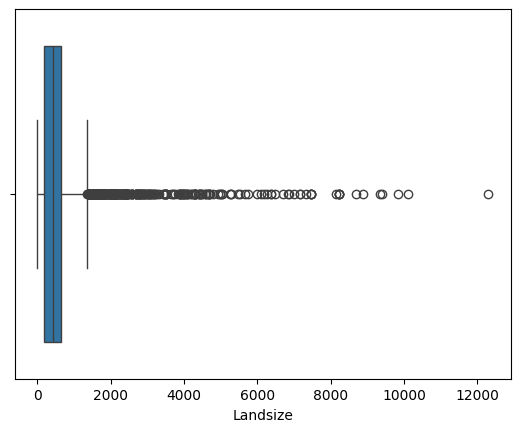

In [38]:
sns.boxplot(x="Landsize",data=newdata)

In [39]:
dataset.shape

(13580, 21)

now using z_score method

In [ ]:
z_score=(dataset["Landsize"]-dataset["Landsize"].mean())/(dataset["Landsize"].std())
z_score

0        True
1        True
2        True
3        True
4        True
         ... 
13575    True
13576    True
13577    True
13578    True
13579    True
Name: Landsize, Length: 13580, dtype: bool

In [ ]:
# putting new colomn as z_score
dataset["z_score"]=z_score
dataset

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,z_score
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,3067,...,1.0,202,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019,-0.089312
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/2/2016,2.5,3067,...,0.0,156,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019,-0.100839
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/3/2017,2.5,3067,...,0.0,134,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019,-0.106352
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,4/3/2017,2.5,3067,...,1.0,94,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019,-0.116375
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/6/2016,2.5,3067,...,2.0,120,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019,-0.109860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000,S,Barry,26/08/2017,16.7,3150,...,2.0,652,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392,0.023451
13576,Williamstown,77 Merrett Dr,3,h,1031000,SP,Williams,26/08/2017,6.8,3016,...,2.0,333,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380,-0.056486
13577,Williamstown,83 Power St,3,h,1170000,S,Raine,26/08/2017,6.8,3016,...,4.0,436,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380,-0.030676
13578,Williamstown,96 Verdon St,4,h,2500000,PI,Sweeney,26/08/2017,6.8,3016,...,5.0,866,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380,0.077076


In [ ]:
# data after using z_score// we use 3 form the chart
dataset[dataset["z_score"]<3].shape

(13556, 22)